In [2]:
#import some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px  # interactive charts
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from scipy import stats

In [4]:
file=pd.read_csv("C:/Users/gluma/Downloads/insurance.csv")

In [5]:
#non null values in the dataset
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


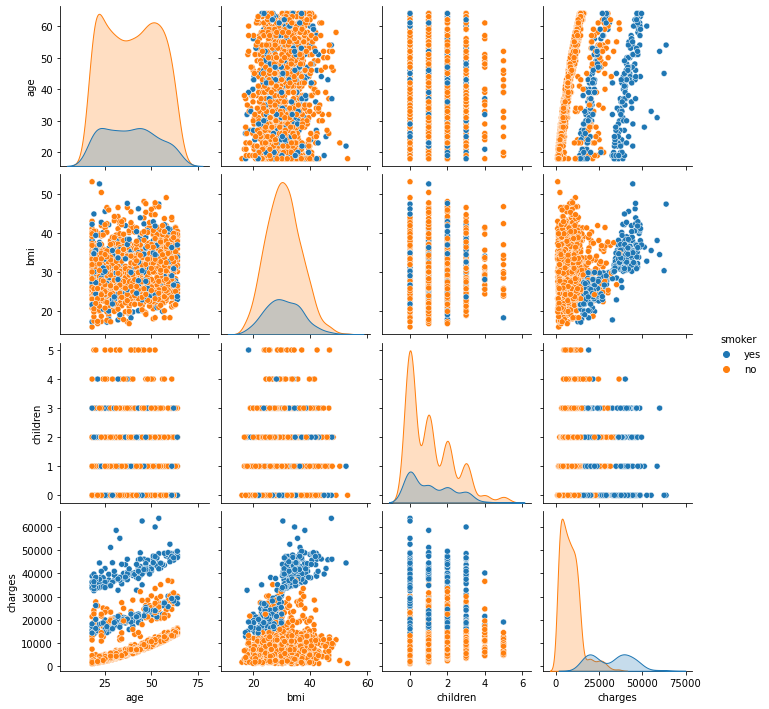

In [6]:
#check for relationship between variables
sns.pairplot(file,hue = 'smoker')

In [7]:
#find unique values of categorical variables
def select_categorical_values(file):
    df_categorical=file.select_dtypes(include=['object'])
    for col in list(df_categorical):
        print(col)
        print(df_categorical[col].unique())
        
select_categorical_values(file)

sex
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'southeast' 'northwest' 'northeast']


In [41]:
#Count frequency in each categorical variable
def count_categorical_values(file):
    df_categorical=file.select_dtypes(include=['object'])
    for col in list(df_categorical):
        print(col)
        print(df_categorical[col].value_counts())
        
count_categorical_values(file)

In [11]:
# replacing values
file['sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)
file['smoker'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
file['region'].replace(['southwest','southeast', 'northwest', 'northeast'],
                        [0, 1,2,3], inplace=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

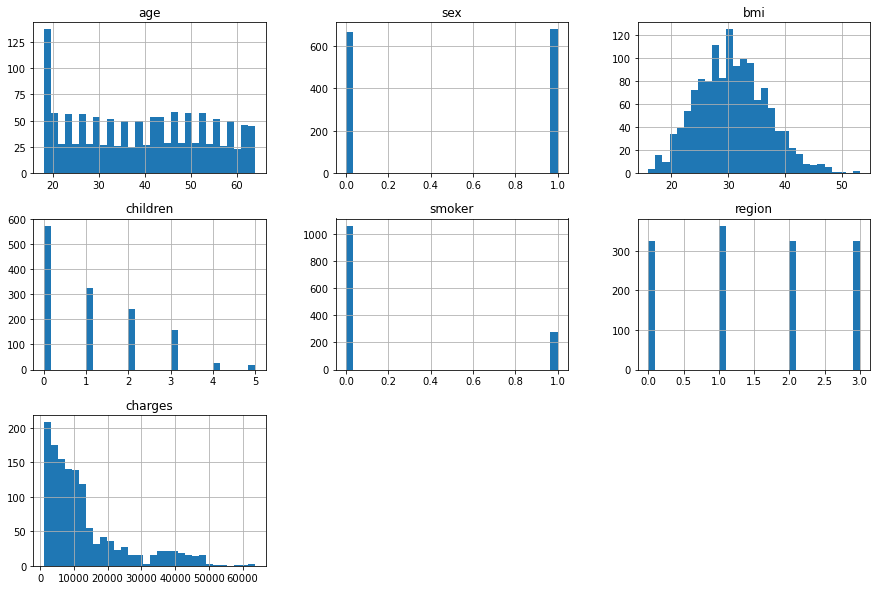

In [12]:
#We see from the histogram below that we need to normalize targer variable (charges) and scale the remaining faetures
file.hist(bins=30, figsize=(15, 10))

In [13]:
#Charges are skewed to the right. Before splitting the data, we need to normalize it otherwise we might have all data points of right tail to the test set.
normalized_y, fitted_lambda = stats.boxcox(file['charges'])
file['charges_tr']=normalized_y

<AxesSubplot:>

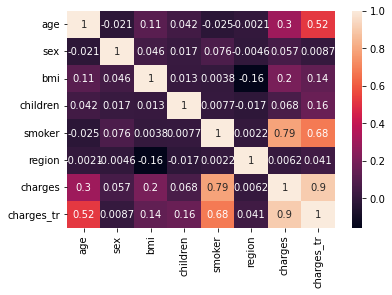

In [14]:
#check correlation between variables
correlation=file.corr(method ='pearson')
sns.heatmap(correlation,annot=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

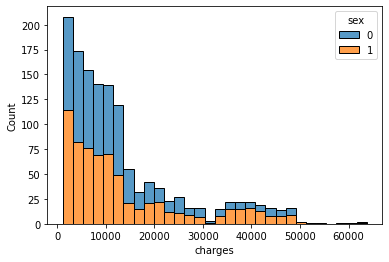

In [15]:
sns.histplot(data=file, x="charges", hue="sex", multiple="stack")

<AxesSubplot:xlabel='charges', ylabel='Count'>

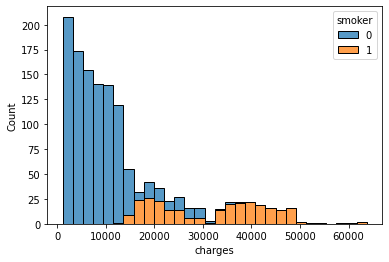

In [16]:
#If customer is a smoker, charges are higher
sns.histplot(data=file, x="charges", hue="smoker", multiple="stack")

In [26]:
#define input variables and target variable
X = file.drop(['charges','charges_tr'],axis=1)
y = file['charges_tr']

In [27]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size = 0.3, random_state=15)
#Scale the x train features

Training set Accuracy: 0.7630706154414414
Test set Accuracy:  0.783645568766107
RMSE on training: 0.6591274286312582
RMSE on test:  0.6479180429573813
MAE training:  0.4086897727716287
MAE on test:  0.41272305337573256


C:\Users\gluma\AppData\Local\Temp/ipykernel_9852/3870389157.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()],


,Actual,Predicted,Residual
38,13.464196,12.996534,0.467663
126,12.146649,11.816784,0.329866
479,8.885724,9.669861,-0.784137
10,9.445640,9.777305,-0.331665
195,8.737904,9.485475,-0.747571
43,10.656348,10.780735,-0.124387
1302,9.679191,9.776753,-0.097563
488,13.793142,13.341303,0.451840
1198,10.674765,10.701348,-0.026583
8,10.677699,10.760754,-0.083055


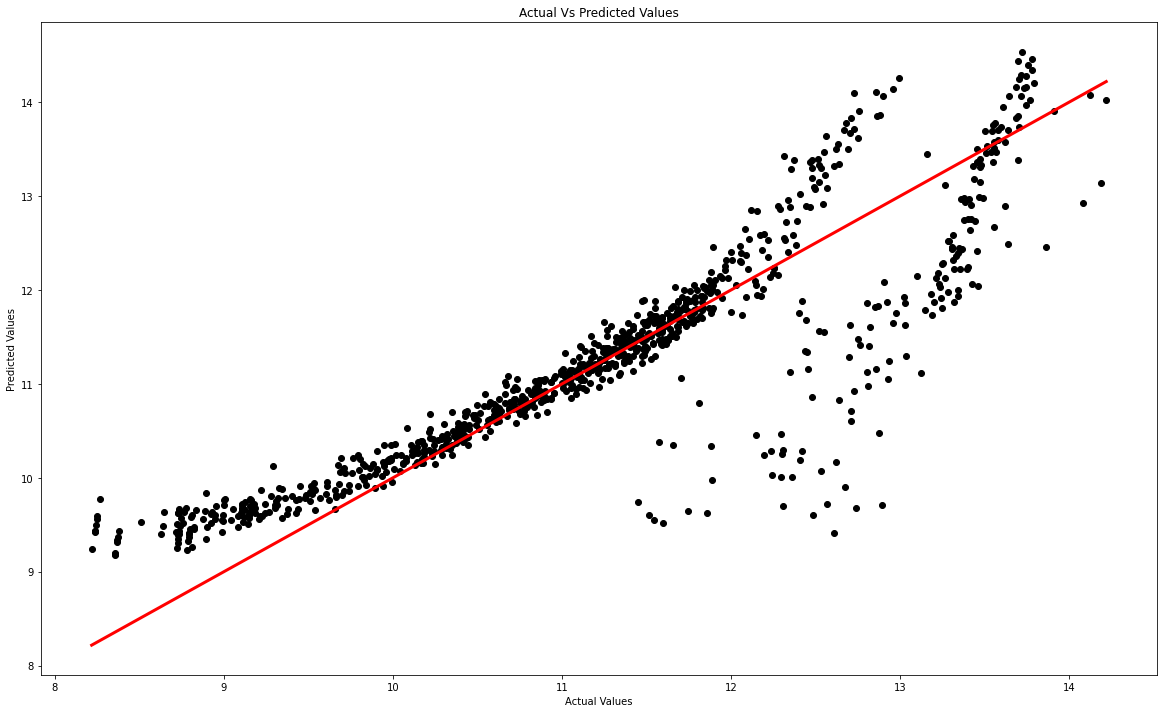

In [28]:
# Run a linear regression model and train it
#Please note that before running the models we applied scaling (with min max scaler) and there was no improvement in the models.
#So, we skipped this process
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train,y_train)
y_pred = lm.predict(X_train)
# Plotting Actuals Vs Predicted
plt.figure(figsize=(20,12))
plt.scatter(y_train, y_pred, c='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 
         'k-', c='red', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
print('Training set Accuracy:', lm.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', lm.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,lm.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': lm.predict(X_test),'Residual': y_test-lm.predict(X_test)})
results.head(10)

Training set Accuracy: 0.763065703859694
Test set Accuracy:  0.7837872701667841
RMSE on training: 0.6591342605011763
RMSE on test:  0.6477058311447885
MAE training:  0.4090404646945713
MAE on test:  0.41272305337573256


C:\Users\gluma\AppData\Local\Temp/ipykernel_9852/3847949910.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()],


,Actual,Predicted,Residual
38,13.464196,12.990935,0.473261
126,12.146649,11.810493,0.336157
479,8.885724,9.672045,-0.786321
10,9.445640,9.779454,-0.333813
195,8.737904,9.487710,-0.749806
43,10.656348,10.781822,-0.125475
1302,9.679191,9.778020,-0.098829
488,13.793142,13.334626,0.458517
1198,10.674765,10.703308,-0.028544
8,10.677699,10.762768,-0.085070


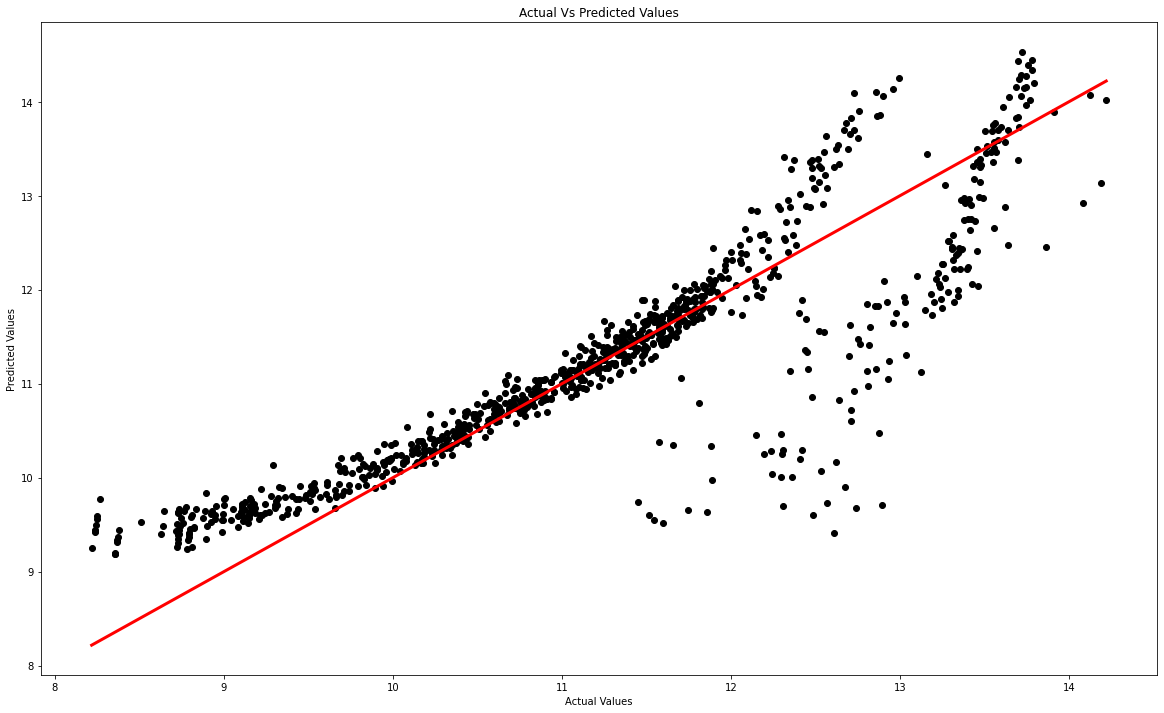

In [29]:
# Run a Bayesian regression model and train it
from sklearn.linear_model import BayesianRidge
# Creating and training model
bayes = BayesianRidge()
bayes.fit(X_train, y_train)
   
# Model making a prediction on test data
y_pred = bayes.predict(X_train)
# Plotting Actuals Vs Predicted
plt.figure(figsize=(20,12))
plt.scatter(y_train, y_pred, c='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 
         'k-', c='red', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
print('Training set Accuracy:', bayes.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', bayes.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,bayes.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,lm.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': bayes.predict(X_test),'Residual': y_test-bayes.predict(X_test)})
results.head(10)

Training set Accuracy: 0.9904417608331925
Test set Accuracy:  0.7816912515470938
RMSE on training: 0.13238807521463866
RMSE on test:  0.6508377676895818
MAE training:  0.05422301334108098
MAE on test:  0.36308636073625855


C:\Users\gluma\AppData\Local\Temp/ipykernel_9852/2972582881.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()],


,Actual,Predicted,Residual
38,13.464196,13.881116,-0.416920
126,12.146649,12.083016,0.063633
479,8.885724,9.090193,-0.204468
10,9.445640,9.112279,0.333361
195,8.737904,8.772060,-0.034156
43,10.656348,10.695525,-0.039177
1302,9.679191,9.870119,-0.190929
488,13.793142,13.510322,0.282821
1198,10.674765,10.702293,-0.027529
8,10.677699,11.184400,-0.506701


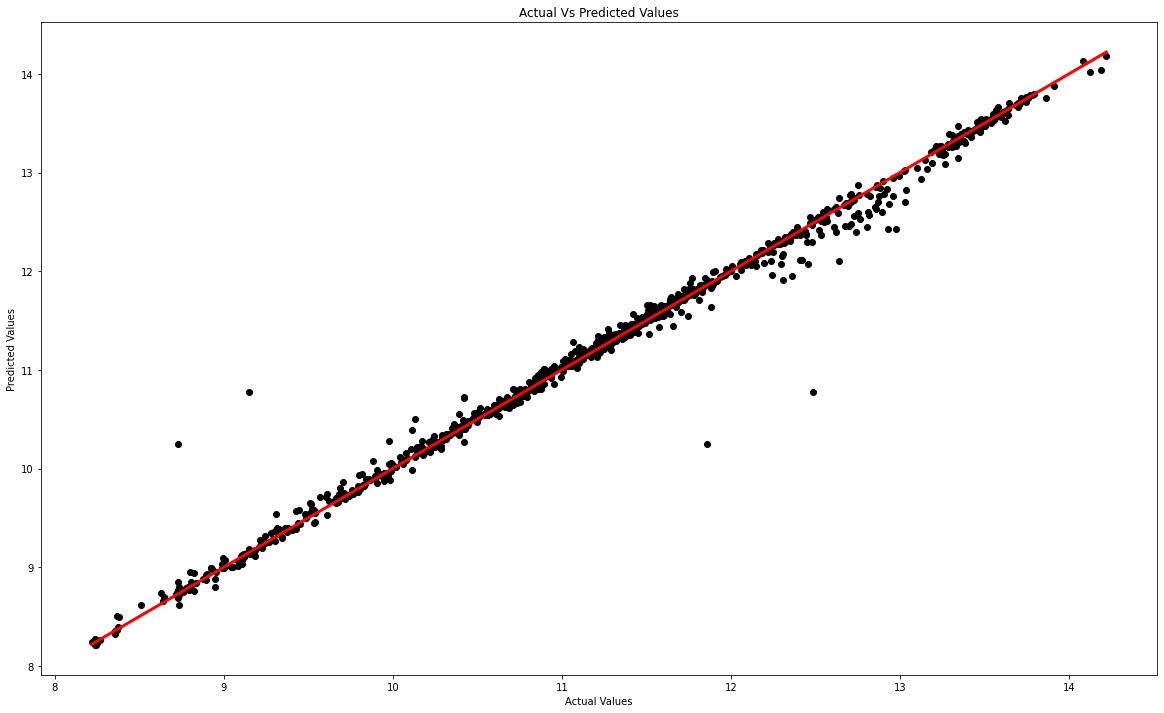

In [30]:
from xgboost import XGBRegressor
# Creating and training model
XG = XGBRegressor()
XG.fit(X_train, y_train)
   
# Model making a prediction on test data
y_pred = XG.predict(X_train)
   
# Plotting Actuals Vs Predicted
plt.figure(figsize=(20,12))
plt.scatter(y_train, y_pred, c='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 
         'k-', c='red', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
print('Training set Accuracy:', XG.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', XG.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,XG.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,XG.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': XG.predict(X_test),'Residual': y_test-XG.predict(X_test)})
results.head(10)
#Model overfits in the training data

Training set Accuracy: 0.8408340712546658
Test set Accuracy:  0.850098185534106
RMSE on training: 0.54023780884814
RMSE on test:  0.5393126681668204
MAE training:  0.2912914656058531
MAE on test:  0.2962600245176248


C:\Users\gluma\AppData\Local\Temp/ipykernel_9852/3655297961.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()],


,Actual,Predicted,Residual
38,13.464196,13.511434,-0.047238
126,12.146649,12.291390,-0.144740
479,8.885724,9.482353,-0.596628
10,9.445640,9.766100,-0.320459
195,8.737904,9.028025,-0.290121
43,10.656348,10.763697,-0.107349
1302,9.679191,10.128219,-0.449029
488,13.793142,13.579790,0.213352
1198,10.674765,10.782675,-0.107910
8,10.677699,10.799955,-0.122256


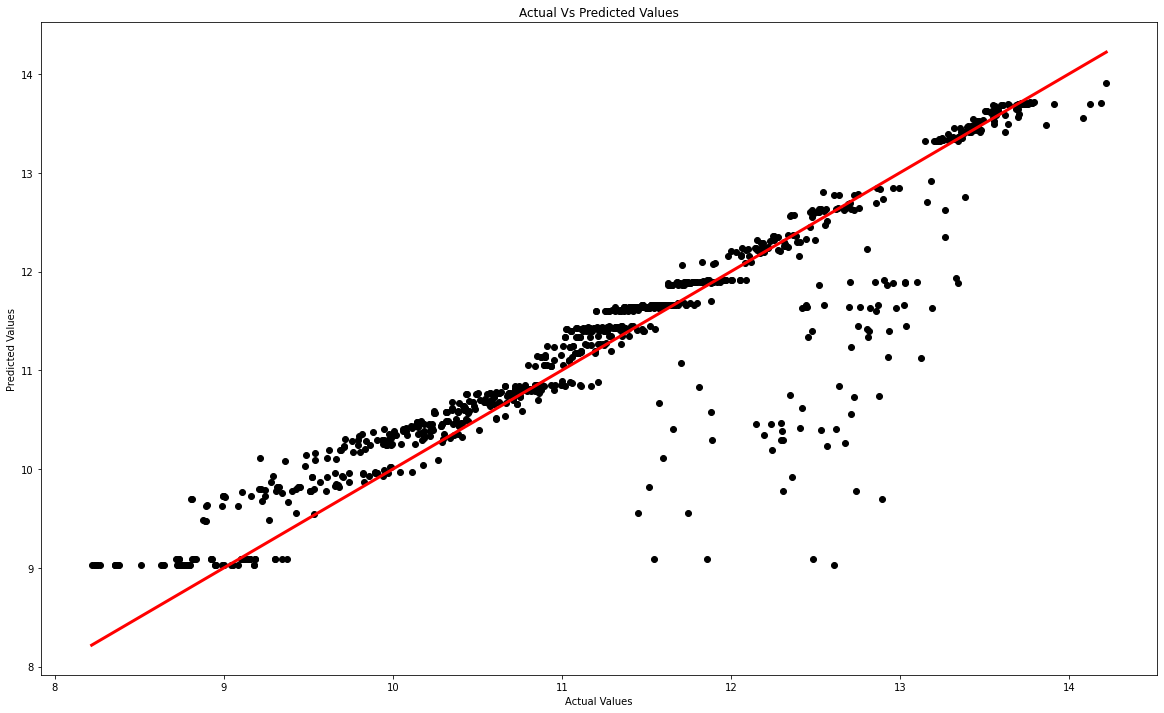

In [31]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Plotting Actuals Vs Predicted
plt.figure(figsize=(20,12))
plt.scatter(y_train, y_pred, c='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 
         'k-', c='red', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
print('Training set Accuracy:', regr.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', regr.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,regr.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': regr.predict(X_test),'Residual': y_test-regr.predict(X_test)})
results.head(10)

Training set Accuracy: 0.9939015248262819
Test set Accuracy:  0.7086875993093329
RMSE on training: 0.10574760776190052
RMSE on test:  0.751824826949613
MAE training:  0.00690916168212055
MAE on test:  0.340280728003435


C:\Users\gluma\AppData\Local\Temp/ipykernel_9852/3963979747.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()],


,Actual,Predicted,Residual
38,13.464196,14.083888,-0.619692
126,12.146649,12.181027,-0.034378
479,8.885724,8.895578,-0.009854
10,9.445640,9.534270,-0.088630
195,8.737904,8.737904,0.000000
43,10.656348,10.601697,0.054651
1302,9.679191,12.194757,-2.515566
488,13.793142,13.511415,0.281727
1198,10.674765,10.611565,0.063200
8,10.677699,10.753669,-0.075971


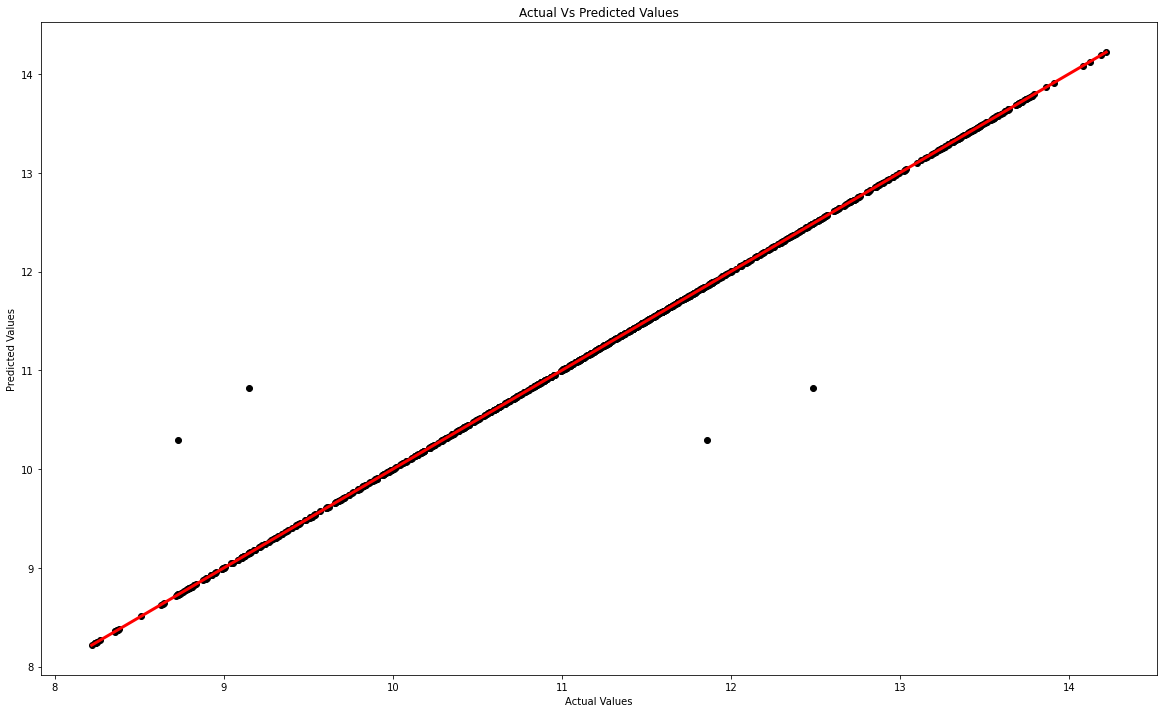

In [32]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
# Plotting Actuals Vs Predicted
plt.figure(figsize=(20,12))
plt.scatter(y_train, y_pred, c='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 
         'k-', c='red', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
print('Training set Accuracy:', regressor.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', regressor.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,regressor.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,regressor.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': regressor.predict(X_test),'Residual': y_test-regressor.predict(X_test)})
results.head(10)
#Decision tree overfits the training data

Training set Accuracy: 0.7437959028668306
Test set Accuracy:  0.7610043688972524
RMSE on training: 0.6854139775198784
RMSE on test:  0.6809765515944883
MAE training:  0.3681248887430407
MAE on test:  0.37192075069503067


C:\Users\gluma\AppData\Local\Temp/ipykernel_14388/2451901031.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()],


,Actual,Predicted,Variance
38,13.464196,12.773092,0.691105
126,12.146649,11.608352,0.538298
479,8.885724,9.367955,-0.482230
10,9.445640,9.557348,-0.111708
195,8.737904,9.166926,-0.429022
43,10.656348,10.625678,0.030670
1302,9.679191,9.666943,0.012248
488,13.793142,13.196952,0.596191
1198,10.674765,10.574612,0.100153
8,10.677699,10.593908,0.083791


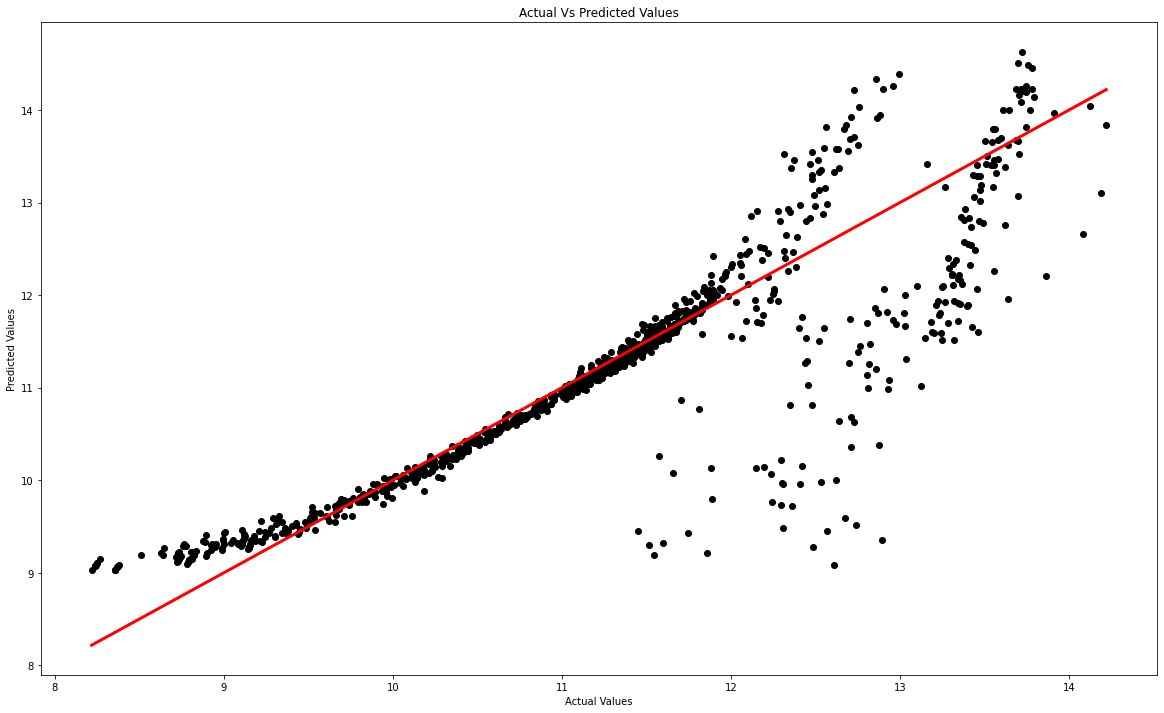

In [33]:
from sklearn.svm import SVR
svrregressor = SVR(kernel = 'linear')
svrregressor.fit(X_train, y_train)
y_pred = svrregressor.predict(X_train)
# Plotting Actuals Vs Predicted
plt.figure(figsize=(20,12))
plt.scatter(y_train, y_pred, c='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 
         'k-', c='red', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
print('Training set Accuracy:', svrregressor.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', svrregressor.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,svrregressor.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,svrregressor.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': svrregressor.predict(X_test),'Residual': y_test-svrregressor.predict(X_test)})
results.head(10)

In [ ]:
#Overall, we can say that random forest regressor is the best performing model.
#Since it has high r2 and the test data performs even better in prediction.
#RMSE and MAE are the smallest in random forest compared to other models

In [33]:
#Next step is to fine tune the random forest regressor with hyperparameter tunning
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'bootstrap': [True],
    'max_depth': [2,4,8,10],
    'max_features': [2, 3,4,6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid = GridSearchCV(estimator = regr, param_grid = parameter_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid.fit(X_train, y_train)

grid.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 300}

In [34]:
#Find the best parameters
best_grid = grid.best_estimator_
best_grid

RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=5,
                      min_samples_split=8, n_estimators=300, random_state=0)

In [38]:
#The Random Forest Regressor with hyperparameter tunning overfits the training data while it performs a bit worse on test data
#So, we can conclude that the strongest model is Random Forest without the tunning
best_grid = grid.best_estimator_

regr2 = best_grid
regr2.fit(X_train, y_train)
y_pred = regr2.predict(X_train)
print('Training set Accuracy:', regr2.score(X_train,y_train) )   
# Accuracy on test data
print('Test set Accuracy: ', regr2.score(X_test,y_test) )
# The Root Mean Squared Error (RMSE)
print('RMSE on training:',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE on test: ',sqrt(mean_squared_error(y_test,regr2.predict(X_test))))
# Mean Absolute Error (MAE)
print('MAE training: ',mean_absolute_error(y_train,y_pred))
print('MAE on test: ',mean_absolute_error(y_test,regr2.predict(X_test)))
results = pd.DataFrame({'Actual': y_test, 'Predicted': regr2.predict(X_test),'Residual': y_test-regr2.predict(X_test)})
results.head(10)

Training set Accuracy: 0.8895679387884653
Test set Accuracy:  0.8483553254758984
RMSE on training: 0.44999481588048096
RMSE on test:  0.5424388149918443
MAE training:  0.23497606423631034
MAE on test:  0.2864053327751247


,Actual,Predicted,Residual
38,13.464196,13.494805,-0.030609
126,12.146649,12.310314,-0.163665
479,8.885724,9.191544,-0.305820
10,9.445640,9.379379,0.066261
195,8.737904,8.908201,-0.170297
43,10.656348,10.767754,-0.111406
1302,9.679191,10.133070,-0.453879
488,13.793142,13.594716,0.198426
1198,10.674765,10.758915,-0.084150
8,10.677699,11.019036,-0.341337


In [39]:
file.tail(2)

,age,sex,bmi,children,smoker,region,charges,charges_tr
1336,21,0,25.80,0,0,0,2007.9450,9.019131
1337,61,0,29.07,0,1,2,29141.3603,12.973661


In [40]:
#Play with model and see how accurate it predicts values, using values from the dataset. 
#Keep in mind to compare result based on tranformed Y variable ("charges_tr")
features=[21,0,25.80,0,0,0]
samples_to_predict=np.array(features).reshape(1, -1)
regr.predict(samples_to_predict)

array([9.45071382])